In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [16]:
ds=pd.read_csv('C:\Quality_Concrete PS-1.csv')
ds

,Unnamed: 0,Chloride,Label,Organic_Carbon,Solids,Sulphate,Turbidity,ph
0,0,1119.324168,1,178.253002,526.051381,305.391066,1956.909586,2.019602
1,1,1036.079757,1,121.985937,751.978355,202.951022,1816.186138,5.979678
2,2,1533.371242,1,100.844370,1940.216276,158.901826,1850.391669,3.647249
3,3,530.060453,1,169.685077,1667.346846,312.075730,677.841225,5.598852
4,4,1633.186960,1,148.456935,1401.681101,204.934673,416.156446,4.234521
...,...,...,...,...,...,...,...,...
9995,1995,1160.140252,1,62.559394,1830.670755,170.911606,948.376706,2.898108
9996,1996,1810.432422,1,104.346350,1991.803437,282.877402,1964.359366,5.235614
9997,1997,1039.441333,1,172.193162,919.904749,160.812509,980.138093,4.058639
9998,1998,1637.732218,0,183.601604,1161.583133,83.375289,583.113548,5.399111


In [17]:
ds=ds.drop(columns=['Unnamed: 0'])

In [18]:
ds

,Chloride,Label,Organic_Carbon,Solids,Sulphate,Turbidity,ph
0,1119.324168,1,178.253002,526.051381,305.391066,1956.909586,2.019602
1,1036.079757,1,121.985937,751.978355,202.951022,1816.186138,5.979678
2,1533.371242,1,100.844370,1940.216276,158.901826,1850.391669,3.647249
3,530.060453,1,169.685077,1667.346846,312.075730,677.841225,5.598852
4,1633.186960,1,148.456935,1401.681101,204.934673,416.156446,4.234521
...,...,...,...,...,...,...,...
9995,1160.140252,1,62.559394,1830.670755,170.911606,948.376706,2.898108
9996,1810.432422,1,104.346350,1991.803437,282.877402,1964.359366,5.235614
9997,1039.441333,1,172.193162,919.904749,160.812509,980.138093,4.058639
9998,1637.732218,0,183.601604,1161.583133,83.375289,583.113548,5.399111


In [19]:
ds.isnull().sum()

Chloride          0
Label             0
Organic_Carbon    0
Solids            0
Sulphate          0
Turbidity         0
ph                0
dtype: int64

<Axes: >

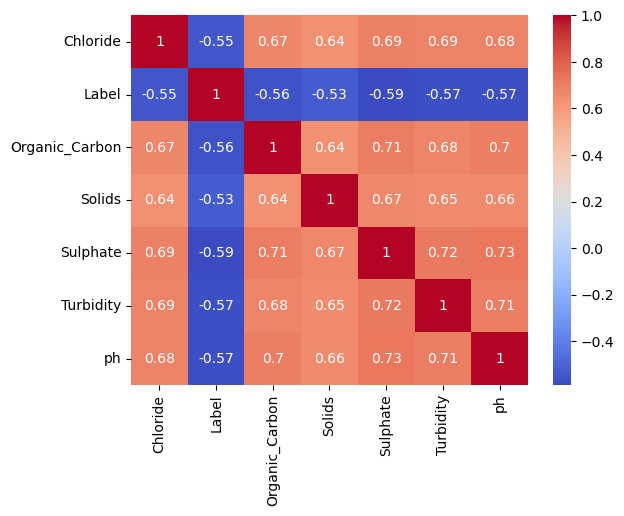

In [20]:
sns.heatmap(ds.corr(),annot=True,cmap='coolwarm')

In [21]:
a=ds.drop(columns='Label')
b=ds['Label']
a

,Chloride,Organic_Carbon,Solids,Sulphate,Turbidity,ph
0,1119.324168,178.253002,526.051381,305.391066,1956.909586,2.019602
1,1036.079757,121.985937,751.978355,202.951022,1816.186138,5.979678
2,1533.371242,100.844370,1940.216276,158.901826,1850.391669,3.647249
3,530.060453,169.685077,1667.346846,312.075730,677.841225,5.598852
4,1633.186960,148.456935,1401.681101,204.934673,416.156446,4.234521
...,...,...,...,...,...,...
9995,1160.140252,62.559394,1830.670755,170.911606,948.376706,2.898108
9996,1810.432422,104.346350,1991.803437,282.877402,1964.359366,5.235614
9997,1039.441333,172.193162,919.904749,160.812509,980.138093,4.058639
9998,1637.732218,183.601604,1161.583133,83.375289,583.113548,5.399111


In [22]:
from sklearn.model_selection import train_test_split
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=42)

In [23]:
from sklearn import metrics

For a Logistic Regression Model:
Accuracy = 0.858
Precision = 0.7603513174404015
F1 score = 0.8101604278074866
Recall = 0.8669527896995708


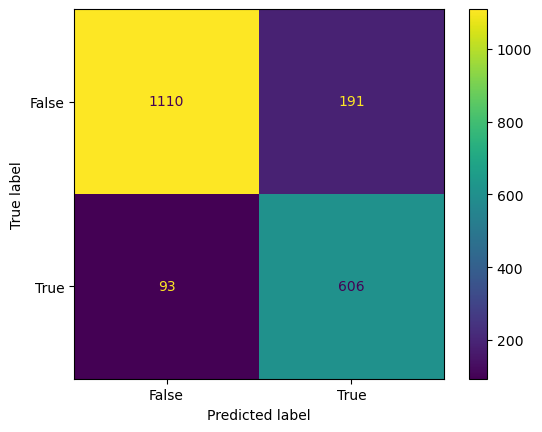

In [24]:
log=LogisticRegression(max_iter=1000)
log.fit(a_train,b_train)
pred_1=log.predict(a_test)
acc_LR=accuracy_score(b_test,pred_1)
prec_LR=precision_score(b_test, pred_1)
f1_LR=f1_score(b_test, pred_1)
recall_LR=recall_score(b_test, pred_1)
CM_LR=metrics.confusion_matrix(b_test,pred_1)
CM_LR_graph=metrics.ConfusionMatrixDisplay(confusion_matrix = CM_LR, display_labels = [False, True])
print("For a Logistic Regression Model:")
print("Accuracy =",acc_LR)
print("Precision =",prec_LR)
print("F1 score =",f1_LR)
print("Recall =",recall_LR)
CM_LR_graph.plot()
plt.show()

For a Random Forest Classifier Model:
Accuracy = 0.7745
Precision = 0.6968253968253968
F1 score = 0.6606471030850264
Recall = 0.6280400572246065


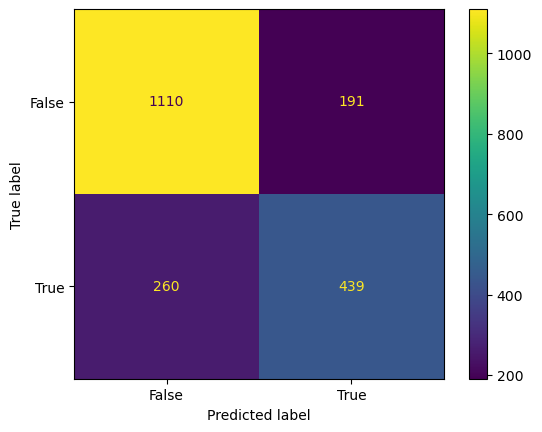

In [25]:
rfc=RandomForestClassifier()
rfc.fit(a_train,b_train)
pred_2=rfc.predict(a_test)
acc_RFC=accuracy_score(b_test,pred_2)
prec_RFC=precision_score(b_test, pred_2)
f1_RFC=f1_score(b_test, pred_2)
recall_RFC=recall_score(b_test, pred_2)
CM_RFC=metrics.confusion_matrix(b_test,pred_2)
CM_RFC_graph=metrics.ConfusionMatrixDisplay(confusion_matrix = CM_RFC, display_labels = [False, True])
print("For a Random Forest Classifier Model:")
print("Accuracy =",acc_RFC)
print("Precision =",prec_RFC)
print("F1 score =",f1_RFC)
print("Recall =",recall_RFC)
CM_RFC_graph.plot()
plt.show()

For a K Neighbors Classifier Model:
Accuracy = 0.856
Precision = 0.7597977243994943
F1 score = 0.8067114093959732
Recall = 0.8597997138769671


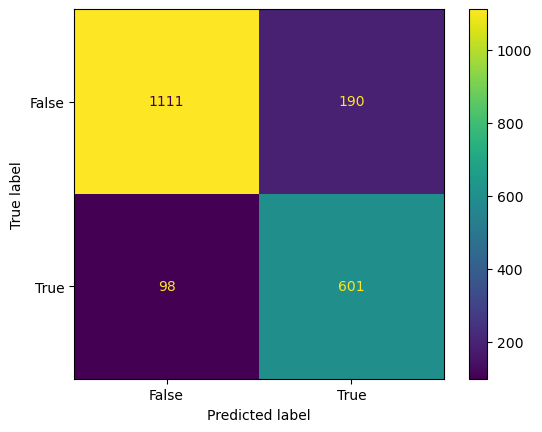

In [26]:
for j in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=j)
    knn.fit(a_train,b_train)
    pred_3=knn.predict(a_test)
    acc_KNC=accuracy_score(b_test,pred_3)
    prec_KNC=precision_score(b_test, pred_3)
    f1_KNC=f1_score(b_test, pred_3)
    recall_KNC=recall_score(b_test, pred_3)
    CM_KNC=metrics.confusion_matrix(b_test,pred_3)
    CM_KNC_graph=metrics.ConfusionMatrixDisplay(confusion_matrix = CM_KNC, display_labels = [False, True])
print("For a K Neighbors Classifier Model:")
print("Accuracy =",acc_KNC)
print("Precision =",prec_KNC)
print("F1 score =",f1_KNC)
print("Recall =",recall_KNC)
CM_KNC_graph.plot()
plt.show()

For a Support Vector Machine Model:
Accuracy = 0.8575
Precision = 0.7593984962406015
F1 score = 0.8096192384769539
Recall = 0.8669527896995708


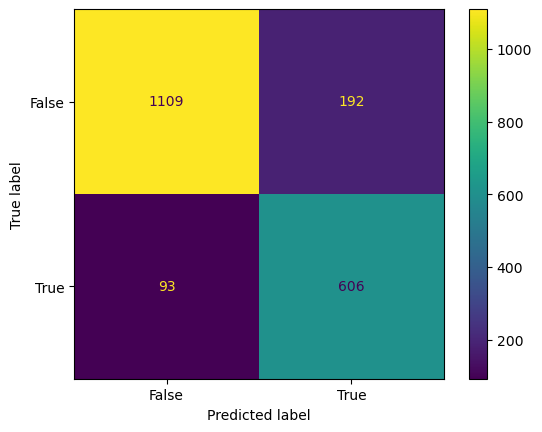

In [27]:
SVM=svm.SVC(max_iter=10000)
SVM.fit(a_train,b_train)
pred_4=SVM.predict(a_test)
acc_SVM=accuracy_score(b_test,pred_4)
prec_SVM=precision_score(b_test, pred_4)
f1_SVM=f1_score(b_test, pred_4)
recall_SVM=recall_score(b_test, pred_4)
CM_SVM=metrics.confusion_matrix(b_test,pred_4)
CM_SVM_graph=metrics.ConfusionMatrixDisplay(confusion_matrix = CM_SVM, display_labels = [False, True])
print("For a Support Vector Machine Model:")
print("Accuracy =",acc_SVM)
print("Precision =",prec_SVM)
print("F1 score =",f1_SVM)
print("Recall =",recall_SVM)
CM_SVM_graph.plot()
plt.show()

In [28]:
water_sample=[[764.8493,134.9274,989.3682,224.8363,1204.8746,3.1943]]
predict=log.predict(water_sample)
if predict[0]==0:
    print("Quality of the water sample is unsuitable for concrete production.")
else:
    print("Quality of the water sample is suitable for concrete production ")

Quality of the water sample is good
